In [38]:
import pandas as pd
import spacy
from spacy import displacy
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np

In [1]:
sns.set_style('whitegrid')
%config InlineBackend.figure_formats = ['svg']

nlp = spacy.load('en_core_web_sm')
df_raw = pd.read_csv("C:/Users/julia/OneDrive/Desktop/IntroToInformatics/i501/WebApp/projectData/LifeProTips Top Scoring.csv")

NameError: name 'sns' is not defined

In [3]:
df2 = df_raw[['postTitle']].copy()

docTitle = list(nlp.pipe(df2['postTitle'], disable=['ner', 'parser', 'textcat']))
df2['spacy_doc'] = docTitle

In [4]:
def tokenizer(docs, join_tokens=True):
  
    docTitle_clean = []
    
    for doc in docTitle:
        
        tokens = [w.lemma_.lower() for w in doc if 
                  ( not w.is_punct 
                  and not w.__len__ == 1
                   and not w.like_num
                   and w.lemma_ != 'LPT'
                   and w.lemma_ != 'and'
                   and w.lemma_ != 'I'
                   and w.lemma_ != 'or'
                   and w.lemma_ != 'of'
                   and w.lemma_ != 'to'
                   and w.lemma_ != 'be'
                   and w.lemma_ != 'in'
                   and w.lemma_ != 'if'
                   and w.lemma_ != 'an'
                   and w.lemma_ != 'because'
                   and w.lemma_ != 'when'
                   ) 
                  ]
        
        if join_tokens:
            docTitle_clean.append(' '.join(tokens))
        else:
            docTitle_clean.append(tokens)
    
    return docTitle_clean

In [5]:

df2['docs_clean'] = tokenizer(docTitle)
df2[['postTitle', 'spacy_doc', 'docs_clean']].head()

,postTitle,spacy_doc,docs_clean
0,"LPT: keep your mouth shut, and don't volunteer...","(LPT, :, keep, your, mouth, shut, ,, and, do, ...",keep your mouth shut do n't volunteer information
1,LPT: Try not to be mean or toxic in online gam...,"(LPT, :, Try, not, to, be, mean, or, toxic, in...",try not mean toxic online game today tommorow ...
2,LPT: Your company didn‚Äôt know you existed be...,"(LPT, :, Your, company, didn‚Äôt, know, you, e...",your company didn‚äôt know you exist before yo...
3,LPT: Just because you did something wrong in t...,"(LPT, :, Just, because, you, did, something, w...",just you do something wrong the past doesn‚äôt...
4,"LPT: I'm 43. By your late 20's/early 30's, mak...","(LPT, :, I, 'm, 43, ., By, your, late, 20's, /...",by your late 20' early 's make sure physical f...


In [6]:
dfCleanedTitles = df2[['docs_clean']].copy()

dfCleanedTitles

,docs_clean
0,keep your mouth shut do n't volunteer information
1,try not mean toxic online game today tommorow ...
2,your company didn‚äôt know you exist before yo...
3,just you do something wrong the past doesn‚äôt...
4,by your late 20' early 's make sure physical f...
...,...
1147,you value your quality life don‚äôt enter a sa...
1148,screenshot photo airb&amp;b list before book
1149,you have depression do thing chunk
1150,do n't just talk kid about fire safety have th...


In [7]:
cleanedList = dfCleanedTitles['docs_clean'].values.tolist()


cleanedListFirst = cleanedList[0:2000]

cleanedListFirst

["keep your mouth shut do n't volunteer information",
 'try not mean toxic online game today tommorow as there a lot people who have no family want distract themselves from this time year instead kind thoughtful this go for all year round',
 'your company didn‚äôt know you exist before you apply won‚äôt notice you you‚äôre go take care yourself',
 'just you do something wrong the past doesn‚äôt mean you can‚äôt advocate against it now it doesn‚äôt make you a hypocrite you grow don‚äôt let people use your past invalidate your current mindset growth a concept embrace it',
 "by your late 20' early 's make sure physical fitness become absolute top priority",
 "you do n't have all the fact try give people the most generous reason you can for their behaviour annoyingly slow driver maybe it a mom with a birthday cake the back this mindset will gradually make you less reactive more compassionate more forgiving your own bad day",
 'a friend a family member get diagnose with dementia alzheimer t

In [8]:
cv = CountVectorizer(ngram_range=(1, 1),  
                     max_df=4000,          
                     min_df=1,            
                     max_features=10000,   
                     binary=True)        

X = cv.fit_transform(cleanedListFirst)

dfArray = pd.DataFrame(X.toarray(), 
                  index=cleanedListFirst,
                  columns=cv.get_feature_names_out())

In [9]:
dfArray

,10,100x,10mins,10x,1500,16,19,1x1,20,200,...,äútwo,äúvery,äúwalk,äúweak,äúwedding,äúwhat,äúwhole,äúworke,äúyou,äúyour
keep your mouth shut do n't volunteer information,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
try not mean toxic online game today tommorow as there a lot people who have no family want distract themselves from this time year instead kind thoughtful this go for all year round,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
your company didn‚äôt know you exist before you apply won‚äôt notice you you‚äôre go take care yourself,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
just you do something wrong the past doesn‚äôt mean you can‚äôt advocate against it now it doesn‚äôt make you a hypocrite you grow don‚äôt let people use your past invalidate your current mindset growth a concept embrace it,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
by your late 20' early 's make sure physical fitness become absolute top priority,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
you value your quality life don‚äôt enter a saturated field even you‚äôre really good especially you‚äôre really good,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
screenshot photo airb&amp;b list before book,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
you have depression do thing chunk,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
do n't just talk kid about fire safety have they explain you what they would do emergency so you know what you need explain far,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
cleanedList2 = df2['postTitle'].values.tolist()
count_vectorizer = CountVectorizer()
for x in df2:
    bag_of_words = count_vectorizer.fit_transform(df2['postTitle'])
    bag_of_words = pd.DataFrame(bag_of_words.toarray(),
                                index=df2,
                            columns = count_vectorizer.get_feature_names_out())

In [11]:
dfAll = bag_of_words

dfAll

,000,00000,000ft,010101,08,10,100,100x,10mins,10x,...,äútwo,äúvery,äúwalk,äúweak,äúwedding,äúwhat,äúwhole,äúworking,äúyou,äúyour
"(LPT: keep your mouth shut, and don't volunteer information, (LPT, :, keep, your, mouth, shut, ,, and, do, n't, volunteer, information), keep your mouth shut do n't volunteer information)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(LPT: Try not to be mean or toxic in online games today and tommorow as there are a lot of people who have no family and want to distract themselves from this time of year. Instead be kind and thoughtful. This goes for all year round., (LPT, :, Try, not, to, be, mean, or, toxic, in, online, games, today, and, tommorow, as, there, are, a, lot, of, people, who, have, no, family, and, want, to, distract, themselves, from, this, time, of, year, ., Instead, be, kind, and, thoughtful, ., This, goes, for, all, year, round, .), try not mean toxic online game today tommorow as there a lot people who have no family want distract themselves from this time year instead kind thoughtful this go for all year round)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(LPT: Your company didn‚Äôt know you existed before you applied and won‚Äôt notice you when you‚Äôre gone. Take care of yourself., (LPT, :, Your, company, didn‚Äôt, know, you, existed, before, you, applied, and, won‚Äôt, notice, you, when, you‚Äôre, gone, ., Take, care, of, yourself, .), your company didn‚äôt know you exist before you apply won‚äôt notice you you‚äôre go take care yourself)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(LPT: Just because you did something wrong in the past, doesn‚Äôt mean you can‚Äôt advocate against it now. It doesn‚Äôt make you a hypocrite. You grew. Don‚Äôt let people use your past to invalidate your current mindset. Growth is a concept. Embrace it., (LPT, :, Just, because, you, did, something, wrong, in, the, past, ,, doesn‚Äôt, mean, you, can‚Äôt, advocate, against, it, now, ., It, doesn‚Äôt, make, you, a, hypocrite, ., You, grew, ., Don‚Äôt, let, people, use, your, past, to, invalidate, your, current, mindset, ., Growth, is, a, concept, ., Embrace, it, .), just you do something wrong the past doesn‚äôt mean you can‚äôt advocate against it now it doesn‚äôt make you a hypocrite you grow don‚äôt let people use your past invalidate your current mindset growth a concept embrace it)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(LPT: I'm 43. By your late 20's/early 30's, make sure physical fitness becomes an absolute top priority., (LPT, :, I, 'm, 43, ., By, your, late, 20's, /, early, 30, 's, ,, make, sure, physical, fitness, becomes, an, absolute, top, priority, .), by your late 20' early 's make sure physical fitness become absolute top priority)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(LPT: if you value your quality of life, don‚Äôt enter a saturated field even if you‚Äôre really good. Especially if you‚Äôre really good., (LPT, :, if, you, value, your, quality, of, life, ,, don‚Äôt, enter, a, saturated, field, even, if, you‚Äôre, really, good, ., Especially, if, you‚Äôre, really, good, .), you value your quality life don‚äôt enter a saturated field even you‚äôre really good especially you‚äôre really good)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(LPT: Screenshot/photo an AirB&amp;B listing BEFORE booking, (LPT, :, Screenshot, /, photo, an, AirB&amp;B, listing, BEFORE, booking), screenshot photo airb&amp;b list before book)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(LPT: If you have depression do things in chunks., (LPT, :, If, you, have, depression, do, things, in, chunks, .), you have depression do thing chunk)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(LPT: Don't just talk to kids about fire safety, have them explain to you what they'd do in an emergency, so you know what you need to explain further., (LPT, :, Do, n't, just, talk, to, kids, about, fire, safety, ,, have, them, explain

In [12]:
for (columnName, columnData) in dfAll.items():
    x = columnName
    if x.isnumeric():
        dfAll.drop(x, axis=1, inplace=True)

In [13]:
for (columnName, columnData) in dfAll.items():
    a = columnName
    if a.isalpha() == False:

        dfAll.drop(a, axis=1, inplace=True)

In [15]:
for (columnName, columnData) in dfAll.items():
    s = 'ä'
    b = columnName
    c = b.split()
    for i in range(len(c)):
        if s in b:
            dfAll.drop(b, axis=1, inplace=True)


In [16]:
for (columnName, columnData) in dfAll.items():
    a = columnName
    if a == 'you' or a == 'the' or a=='an' or a=='and':

        dfAll.drop(a, axis=1, inplace=True)

    
dfAll

,abandon,able,about,above,abroad,absolute,absolutely,absorb,absorbing,absorption,...,youth,youtube,zealot,zero,zip,zippo,zips,zone,zoo,zoom
"(LPT: keep your mouth shut, and don't volunteer information, (LPT, :, keep, your, mouth, shut, ,, and, do, n't, volunteer, information), keep your mouth shut do n't volunteer information)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(LPT: Try not to be mean or toxic in online games today and tommorow as there are a lot of people who have no family and want to distract themselves from this time of year. Instead be kind and thoughtful. This goes for all year round., (LPT, :, Try, not, to, be, mean, or, toxic, in, online, games, today, and, tommorow, as, there, are, a, lot, of, people, who, have, no, family, and, want, to, distract, themselves, from, this, time, of, year, ., Instead, be, kind, and, thoughtful, ., This, goes, for, all, year, round, .), try not mean toxic online game today tommorow as there a lot people who have no family want distract themselves from this time year instead kind thoughtful this go for all year round)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(LPT: Your company didn‚Äôt know you existed before you applied and won‚Äôt notice you when you‚Äôre gone. Take care of yourself., (LPT, :, Your, company, didn‚Äôt, know, you, existed, before, you, applied, and, won‚Äôt, notice, you, when, you‚Äôre, gone, ., Take, care, of, yourself, .), your company didn‚äôt know you exist before you apply won‚äôt notice you you‚äôre go take care yourself)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(LPT: Just because you did something wrong in the past, doesn‚Äôt mean you can‚Äôt advocate against it now. It doesn‚Äôt make you a hypocrite. You grew. Don‚Äôt let people use your past to invalidate your current mindset. Growth is a concept. Embrace it., (LPT, :, Just, because, you, did, something, wrong, in, the, past, ,, doesn‚Äôt, mean, you, can‚Äôt, advocate, against, it, now, ., It, doesn‚Äôt, make, you, a, hypocrite, ., You, grew, ., Don‚Äôt, let, people, use, your, past, to, invalidate, your, current, mindset, ., Growth, is, a, concept, ., Embrace, it, .), just you do something wrong the past doesn‚äôt mean you can‚äôt advocate against it now it doesn‚äôt make you a hypocrite you grow don‚äôt let people use your past invalidate your current mindset growth a concept embrace it)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(LPT: I'm 43. By your late 20's/early 30's, make sure physical fitness becomes an absolute top priority., (LPT, :, I, 'm, 43, ., By, your, late, 20's, /, early, 30, 's, ,, make, sure, physical, fitness, becomes, an, absolute, top, priority, .), by your late 20' early 's make sure physical fitness become absolute top priority)",0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(LPT: if you value your quality of life, don‚Äôt enter a saturated field even if you‚Äôre really good. Especially if you‚Äôre really good., (LPT, :, if, you, value, your, quality, of, life, ,, don‚Äôt, enter, a, saturated, field, even, if, you‚Äôre, really, good, ., Especially, if, you‚Äôre, really, good, .), you value your quality life don‚äôt enter a saturated field even you‚äôre really good especially you‚äôre really good)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(LPT: Screenshot/photo an AirB&amp;B listing BEFORE booking, (LPT, :, Screenshot, /, photo, an, AirB&amp;B, listing, BEFORE, booking), screenshot photo airb&amp;b list before book)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(LPT: If you have depression do things in chunks., (LPT, :, If, you, have, depression, do, things, in, chunks, .), you have depression do thing chunk)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(LPT: Don't just talk to kids about fire safety, have them explain to you what they'd do in an emergency, so you know what you need to explain further., (LPT, :, Do, n't, just, talk, to, kids, about, fire, safety, ,, have, th

In [42]:
# Sum of each column
sum_column = np.sum(dfAll,axis=0)

dfSum=pd.DataFrame(sum_column, columns=['sum']) 

dfSum




,sum
abandon,1
able,14
about,107
above,3
abroad,1
...,...
zippo,1
zips,1
zone,1
zoo,1


In [114]:
mask = dfSum['sum'] <= 2
dfSum1 = dfSum[~mask]
print(dfSum1)

            sum
able         14
about       107
above         3
absolutely    3
abuse         3
...         ...
your        715
yours         3
yourself     69
youtube       5
zip           3

[1441 rows x 1 columns]


In [156]:
dfSumSort = dfSum1.sort_values(['sum'], ascending=[False])

dfSumSortAll = dfSumSort



In [155]:
dfSumSort = dfSumSort.drop('lpt')
dfSumSort = dfSumSort.drop('to')
dfSumSort = dfSumSort.drop('it')
dfSumSort = dfSumSort.drop('if')
dfSumSort = dfSumSort.drop('of')
dfSumSort = dfSumSort.drop('your')
dfSumSort = dfSumSort.drop('in')
dfSumSort = dfSumSort.drop('for')
dfSumSort = dfSumSort.drop('is')
dfSumSort = dfSumSort.drop('or')
dfSumSort = dfSumSort.drop('that')
dfSumSort = dfSumSort.drop('they')
dfSumSort = dfSumSort.drop('when')
dfSumSort = dfSumSort.drop('on')
dfSumSort = dfSumSort.drop('are')
dfSumSort = dfSumSort.drop('don')
dfSumSort = dfSumSort.drop('them')
dfSumSort = dfSumSort.drop('be')
dfSumSort = dfSumSort.drop('have')
dfSumSort = dfSumSort.drop('with')
dfSumSort = dfSumSort.drop('can')
dfSumSort = dfSumSort.drop('will')
dfSumSort = dfSumSort.drop('not')
dfSumSort = dfSumSort.drop('do')
dfSumSort = dfSumSort.drop('get')
dfSumSort = dfSumSort.drop('re')
dfSumSort = dfSumSort.drop('at')
dfSumSort = dfSumSort.drop('as')
dfSumSort = dfSumSort.drop('out')
dfSumSort = dfSumSort.drop('their')
dfSumSort = dfSumSort.drop('about')
dfSumSort = dfSumSort.drop('more')
dfSumSort = dfSumSort.drop('from')
dfSumSort = dfSumSort.drop('just')
dfSumSort = dfSumSort.drop('this')
dfSumSort = dfSumSort.drop('up')
dfSumSort = dfSumSort.drop('like')
dfSumSort = dfSumSort.drop('what')
dfSumSort = dfSumSort.drop('before')
dfSumSort = dfSumSort.drop('than')
dfSumSort = dfSumSort.drop('take')
dfSumSort = dfSumSort.drop('need')
dfSumSort = dfSumSort.drop('by')
dfSumSort = dfSumSort.drop('all')
dfSumSort = dfSumSort.drop('but')
dfSumSort = dfSumSort.drop('so')
dfSumSort = dfSumSort.drop('being')
dfSumSort = dfSumSort.drop('who')
dfSumSort = dfSumSort.drop('because')
dfSumSort = dfSumSort.drop('there')
dfSumSort = dfSumSort.drop('ll')
dfSumSort = dfSumSort.drop('into')
dfSumSort = dfSumSort.drop('ever')
dfSumSort = dfSumSort.drop('even')
dfSumSort = dfSumSort.drop('other')
dfSumSort = dfSumSort.drop('only')
dfSumSort = dfSumSort.drop('while')
dfSumSort = dfSumSort.drop('may')
dfSumSort = dfSumSort.drop('using')
dfSumSort = dfSumSort.drop('still')
dfSumSort = dfSumSort.drop('lot')
dfSumSort = dfSumSort.drop('ve')
dfSumSort = dfSumSort.drop('doesn')
dfSumSort = dfSumSort.drop('too')
dfSumSort = dfSumSort.drop('really')
dfSumSort = dfSumSort.drop('during')
dfSumSort = dfSumSort.drop('likely')
dfSumSort = dfSumSort.drop('etc')
dfSumSort = dfSumSort.drop('less')
dfSumSort = dfSumSort.drop('without')
dfSumSort = dfSumSort.drop('through')
dfSumSort = dfSumSort.drop('which')
dfSumSort = dfSumSort.drop('could')
dfSumSort = dfSumSort.drop('where')
dfSumSort = dfSumSort.drop('next')
dfSumSort = dfSumSort.drop('else')
dfSumSort = dfSumSort.drop('very')
dfSumSort = dfSumSort.drop('also')
dfSumSort = dfSumSort.drop('my')
dfSumSort = dfSumSort.drop('we')
dfSumSort = dfSumSort.drop('would')
dfSumSort = dfSumSort.drop('aren')
dfSumSort = dfSumSort.drop('those')
dfSumSort = dfSumSort.drop('especially')
dfSumSort = dfSumSort.drop('actually')
dfSumSort = dfSumSort.drop('here')
dfSumSort = dfSumSort.drop('its')
dfSumSort = dfSumSort.drop('few')
dfSumSort = dfSumSort.drop('almost')
dfSumSort = dfSumSort.drop('easily')
dfSumSort = dfSumSort.drop('between')
dfSumSort = dfSumSort.drop('late')
dfSumSort = dfSumSort.drop('gets')
dfSumSort = dfSumSort.drop('immediately')
dfSumSort = dfSumSort.drop('already')
dfSumSort = dfSumSort.drop('until')
dfSumSort = dfSumSort.drop('isn')
dfSumSort = dfSumSort.drop('once')
dfSumSort = dfSumSort.drop('us')
dfSumSort = dfSumSort.drop('were')
dfSumSort = dfSumSort.drop('me')
dfSumSort = dfSumSort.drop('unless')
dfSumSort = dfSumSort.drop('probably')
dfSumSort = dfSumSort.drop('quickly')
dfSumSort = dfSumSort.drop('bit')
dfSumSort = dfSumSort.drop('was')
dfSumSort = dfSumSort.drop('another')
dfSumSort = dfSumSort.drop('had')
dfSumSort = dfSumSort.drop('might')
dfSumSort = dfSumSort.drop('both')
dfSumSort = dfSumSort.drop('least')
dfSumSort = dfSumSort.drop('many')
dfSumSort = dfSumSort.drop('making')
dfSumSort = dfSumSort.drop('comes')
dfSumSort = dfSumSort.drop('goes')
dfSumSort = dfSumSort.drop('giving')
dfSumSort = dfSumSort.drop('entire')
dfSumSort = dfSumSort.drop('whether')
dfSumSort = dfSumSort.drop('usually')
dfSumSort = dfSumSort.drop('takes')
dfSumSort = dfSumSort.drop('sure')
dfSumSort = dfSumSort.drop('own')
dfSumSort = dfSumSort.drop('thing')
dfSumSort = dfSumSort.drop('under')
dfSumSort = dfSumSort.drop('become')
dfSumSort = dfSumSort.drop('didn')
dfSumSort = dfSumSort.drop('rather')
dfSumSort = dfSumSort.drop('themselves')
dfSumSort = dfSumSort.drop('been')
dfSumSort = dfSumSort.drop('means')
dfSumSort = dfSumSort.drop('he')
dfSumSort = dfSumSort.drop('simply')
dfSumSort = dfSumSort.drop('sometimes')
dfSumSort = dfSumSort.drop('said')
dfSumSort = dfSumSort.drop('com')
dfSumSort = dfSumSort.drop('allows')
dfSumSort = dfSumSort.drop('her')
dfSumSort = dfSumSort.drop('non')
dfSumSort = dfSumSort.drop('either')
dfSumSort = dfSumSort.drop('easy')
dfSumSort = dfSumSort.drop('each')
dfSumSort = dfSumSort.drop('directly')
dfSumSort = dfSumSort.drop('made')
dfSumSort = dfSumSort.drop('required')
dfSumSort = dfSumSort.drop('enough')
dfSumSort = dfSumSort.drop('needs')
dfSumSort = dfSumSort.drop('whatever')
dfSumSort = dfSumSort.drop('last')
dfSumSort = dfSumSort.drop('left')
dfSumSort = dfSumSort.drop('shows')
dfSumSort = dfSumSort.drop('simple')
dfSumSort = dfSumSort.drop('these')
dfSumSort = dfSumSort.drop('somebody')
dfSumSort = dfSumSort.drop('specific')
dfSumSort = dfSumSort.drop('otherwise')
dfSumSort = dfSumSort.drop('lots')
dfSumSort = dfSumSort.drop('gives')
dfSumSort = dfSumSort.drop('automatically')
dfSumSort = dfSumSort.drop('far')
dfSumSort = dfSumSort.drop('against')
dfSumSort = dfSumSort.drop('difference')
dfSumSort = dfSumSort.drop('effective')
dfSumSort = dfSumSort.drop('dont')
dfSumSort = dfSumSort.drop('difficult')
dfSumSort = dfSumSort.drop('did')
dfSumSort = dfSumSort.drop('part')
dfSumSort = dfSumSort.drop('current')
dfSumSort = dfSumSort.drop('accept')
dfSumSort = dfSumSort.drop('lives')
dfSumSort = dfSumSort.drop('longer')
dfSumSort = dfSumSort.drop('lower')
dfSumSort = dfSumSort.drop('correct')
dfSumSort = dfSumSort.drop('cannot')
dfSumSort = dfSumSort.drop('such')
dfSumSort = dfSumSort.drop('certain')
dfSumSort = dfSumSort.drop('realize')
dfSumSort = dfSumSort.drop('receive')
dfSumSort = dfSumSort.drop('remove')
dfSumSort = dfSumSort.drop('clear')
dfSumSort = dfSumSort.drop('short')
dfSumSort = dfSumSort.drop('helps')
dfSumSort = dfSumSort.drop('got')
dfSumSort = dfSumSort.drop('follow')
dfSumSort = dfSumSort.drop('include')
dfSumSort = dfSumSort.drop('him')
dfSumSort = dfSumSort.drop('guy')
dfSumSort = dfSumSort.drop('instantly')
dfSumSort = dfSumSort.drop('must')
dfSumSort = dfSumSort.drop('er')
dfSumSort = dfSumSort.drop('our')
dfSumSort = dfSumSort.drop('somewhere')
dfSumSort = dfSumSort.drop('taken')
dfSumSort = dfSumSort.drop('dropped')
dfSumSort = dfSumSort.drop('suddenly')
dfSumSort = dfSumSort.drop('called')
dfSumSort = dfSumSort.drop('carry')
dfSumSort = dfSumSort.drop('completely')
dfSumSort = dfSumSort.drop('interesting')
dfSumSort = dfSumSort.drop('quick')
dfSumSort = dfSumSort.drop('since')
dfSumSort = dfSumSort.drop('closed')
dfSumSort = dfSumSort.drop('self')
dfSumSort = dfSumSort.drop('adding')
dfSumSort = dfSumSort.drop('middle')
dfSumSort = dfSumSort.drop('happens')
dfSumSort = dfSumSort.drop('whenever')
dfSumSort = dfSumSort.drop('available')
dfSumSort = dfSumSort.drop('extremely')
dfSumSort = dfSumSort.drop('related')
dfSumSort = dfSumSort.drop('regularly')
dfSumSort = dfSumSort.drop('whole')
dfSumSort = dfSumSort.drop('refuse')
dfSumSort = dfSumSort.drop('reduce')
dfSumSort = dfSumSort.drop('inside')
dfSumSort = dfSumSort.drop('insist')
dfSumSort = dfSumSort.drop('ready')
dfSumSort = dfSumSort.drop('require')
dfSumSort = dfSumSort.drop('gave')
dfSumSort = dfSumSort.drop('actual')
dfSumSort = dfSumSort.drop('similar')
dfSumSort = dfSumSort.drop('clearly')
dfSumSort = dfSumSort.drop('gt')
dfSumSort = dfSumSort.drop('backwards')
dfSumSort = dfSumSort.drop('typically')
dfSumSort = dfSumSort.drop('beyond')
dfSumSort = dfSumSort.drop('told')
dfSumSort = dfSumSort.drop('bottom')
dfSumSort = dfSumSort.drop('towards')
dfSumSort = dfSumSort.drop('tend')
dfSumSort = dfSumSort.drop('slower')
dfSumSort = dfSumSort.drop('shouldn')
dfSumSort = dfSumSort.drop('anytime')
dfSumSort = dfSumSort.drop('soon')
dfSumSort = dfSumSort.drop('anywhere')
dfSumSort = dfSumSort.drop('past')
dfSumSort = dfSumSort.drop('forever')
dfSumSort = dfSumSort.drop('easier')
dfSumSort = dfSumSort.drop('enter')
dfSumSort = dfSumSort.drop('front')
dfSumSort = dfSumSort.drop('equal')
dfSumSort = dfSumSort.drop('itself')
dfSumSort = dfSumSort.drop('eventually')
dfSumSort = dfSumSort.drop('everyday')
dfSumSort = dfSumSort.drop('possible')
dfSumSort = dfSumSort.drop('potentially')
dfSumSort = dfSumSort.drop('below')
dfSumSort = dfSumSort.drop('exactly')
dfSumSort = dfSumSort.drop('everywhere')
dfSumSort = dfSumSort.drop('absolutely')



In [160]:
dfSumSort.sort_index()



,sum
able,14
about,107
above,3
absolutely,3
abuse,3
...,...
your,715
yours,3
yourself,69
youtube,5


In [199]:

#Frequency

df_freq = pd.DataFrame(dfSum1, index=['always', 'never', 'sometimes','often', 'rarely','usually','hardly','occasionally','seldom','normally','constantly','regularly','frequently','daily','weekly','yearly','annually','monthly','everyday','eventually'])


df_freq

,sum
always,69.0
never,56.0
sometimes,9.0
often,20.0
rarely,3.0
usually,11.0
hardly,NaN
occasionally,NaN
seldom,NaN
normally,NaN


<Axes: xlabel='None', ylabel='sum'>

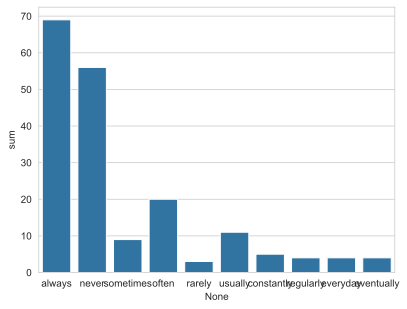

In [200]:
dfFreq= df_freq.dropna(axis=0)
sns.barplot(dfFreq, x=dfFreq.index, y='sum')

In [184]:
dfTechnology = pd.DataFrame(dfSum1, index=['computer','computers','phone','phones','media','video','videos','text','texting','spotify','gmail','netflix','wifi','internet','password','passwords','youtube','email','app','ads','tv','television','movie','screen'])

dfTechnology

,sum
computer,9.0
computers,NaN
phone,49.0
phones,NaN
media,8.0
video,11.0
videos,4.0
text,14.0
texting,NaN
spotify,4.0


<Axes: xlabel='None', ylabel='sum'>

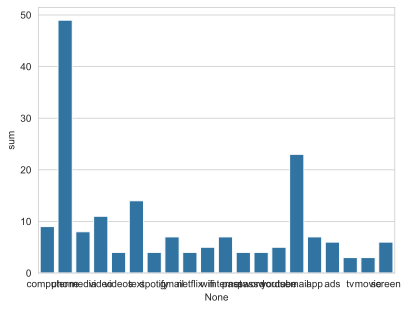

In [197]:
dfTech1= dfTechnology.dropna(axis=0)
sns.barplot(dfTech1, x=dfTech1.index, y='sum')

In [ ]:
dfWork = pd.DataFrame(dfSum1, index=[])

dfWork

In [ ]:
dfRomance = pd.DataFrame(dfSum1, index=[])

dfRomance

In [ ]:
dfSchool = pd.DataFrame(dfSum1, index=[])

dfSchool

In [ ]:
dfFamily = pd.DataFrame(dfSum1, index=[])

dfFamily

In [ ]:
dfHealth = pd.DataFrame(dfSum1, index=[])

dfHealth

In [ ]:
dfAge = pd.DataFrame(dfSum1, index=[])

dfAge

In [ ]:
#Combine total sum of each df and plot them